In [9]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.express as px
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

In [3]:
df = pd.read_csv("DataCoSupplyChainData.csv", encoding = 'unicode_escape')

In [4]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [5]:
df.drop([
    'Customer Email', 
    'Customer Password',
    'Product Image'
], axis = True, inplace = True)

In [6]:
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0
Order City                            0
Order Country                         0


In [7]:
df.drop([
    'Order Zipcode',
    'Product Description'
], axis = 1, inplace = True)

In [25]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Fname', 'Customer Id', 'Customer Lname',
       'Customer Segment', 'Customer State', 'Customer Street',
       'Customer Zipcode', 'Department Id', 'Department Name', 'Latitude',
       'Longitude', 'Market', 'Order City', 'Order Country',
       'Order Customer Id', 'order date (DateOrders)', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Card Id', 'Product Category Id',
       'Product Name', 'Product Price', 'Product Status',
       'shipping date (

In [27]:
df.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Fname                   0
Customer Id                      0
Customer Lname                   8
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 3
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrders)          0
Order Id                         0
Order Item Cardprod 

In [23]:
df.to_csv("DataCoSupplyChainData1.csv")

In [10]:
data_delivery_status=df.groupby(['Delivery Status'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.bar(x=data_delivery_status['Delivery Status'] , y=data_delivery_status['Number of Orders']  , color=data_delivery_status['Number of Orders'],
      labels = { 'Delivery Status': 'Delivery Status', 'Number of Orders': 'Number of Orders'})

In [11]:
data_delivery_status_region=df.groupby(['Delivery Status', 'Order Region'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.bar(data_delivery_status_region, x='Delivery Status', y='Number of Orders'  , color='Order Region',
      )

In [12]:
df['Customer_ID_STR']=df['Customer Id'].astype(str)

data_customers=df.groupby(['Customer_ID_STR'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.bar(data_customers.head(20),x='Number of Orders', y='Customer_ID_STR' , color='Number of Orders'      )


In [14]:
df['Customer_ID_STR']=df['Customer Id'].astype(str)

data_customers_profit=df.groupby(['Customer_ID_STR'])['Order Profit Per Order'].sum().reset_index(name='Profit of Orders').sort_values(by= 'Profit of Orders', ascending= False)
px.bar(data_customers_profit.head(20),x='Profit of Orders', y='Customer_ID_STR' , color='Profit of Orders'      )

In [15]:
#Customer Segments
data_Customer_Segment=df.groupby(['Customer Segment'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.pie(data_Customer_Segment, values='Number of Orders', names= 'Customer Segment' , title= 'Number of Orders of different Customer Segments', 
       width=600 , height=600 , color_discrete_sequence = px.colors.sequential.RdBu)

In [16]:
data=df[(df['Order Country']=='India') & (df['Order Status']=='PENDING')]
print("Number of Cities in India where order status in pending",data[['Order City','Order Country','Order Status']].shape[0])
print("The cities in India where order status is Pending")
data1=data[['Order City','Order Country','Order Status']]
data1.head()

Number of Cities in India where order status in pending 537
The cities in India where order status is Pending


,Order City,Order Country,Order Status
1,Bikaner,India,PENDING
21,Jabalpur,India,PENDING
45,Bangalore,India,PENDING
46,Bangalore,India,PENDING
382,Pune,India,PENDING


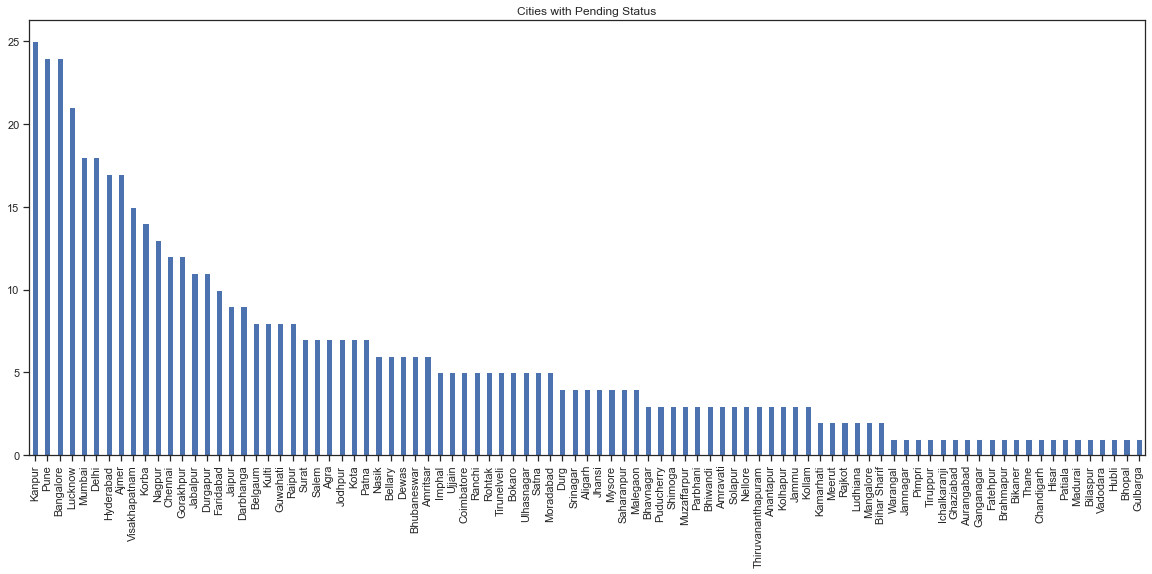

In [17]:
data1=data1['Order City'].value_counts().plot.bar(figsize=(20,8), title="Cities with Pending Status")

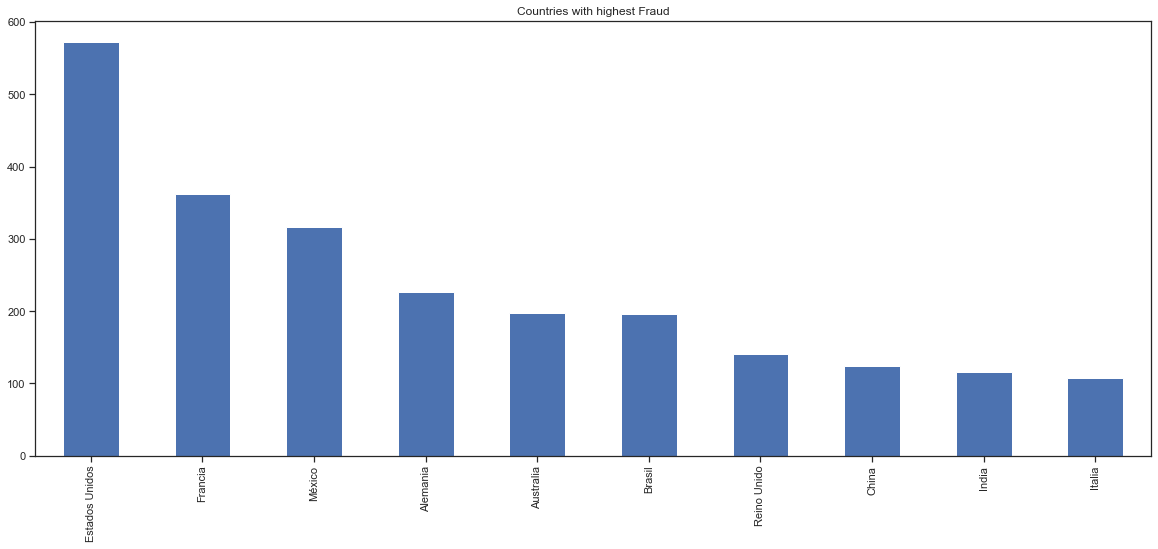

In [18]:
data2=df[df['Order Status']=='SUSPECTED_FRAUD']
data2=data2['Order Country'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Countries with highest Fraud")

In [19]:
max_discount = df['Order Item Discount'].max()
data3=df[df['Order Item Discount']==max_discount]
data3[['Product Name','Order Item Discount']]

,Product Name,Order Item Discount
12606,SOLE E35 Elliptical,500.0


[Text(0, 0.5, 'Sales'), Text(0.5, 0, ''), Text(0.5, 1.0, 'Yearly Sales')]

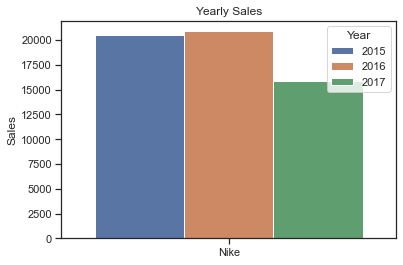

In [20]:
def fun(row):
    if(row.startswith('Nike')):
        return 'Nike'
    else:
        return row
df['Product Name'] =df['Product Name'].apply(fun)

df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'], format='%m/%d/%Y %H:%M')
df['Year'] = pd.DatetimeIndex(df['shipping date (DateOrders)']).year
data5 = df[df['Product Name']=='Nike']
sns.countplot(x ='Product Name', data = data5,hue='Year').set(title='Yearly Sales', xlabel='', ylabel='Sales')

In [21]:
df['Order Status'].unique()

array(['COMPLETE', 'PENDING', 'CLOSED', 'PENDING_PAYMENT', 'CANCELED',
       'PROCESSING', 'SUSPECTED_FRAUD', 'ON_HOLD', 'PAYMENT_REVIEW'],
      dtype=object)

In [22]:
data4=df[(df["Days for shipping (real)"] > df["Days for shipment (scheduled)"]) & (df['Order Status']=='COMPLETE')|(df['Order Status']=='CLOSED')]
data4.shape[0]

53815